In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
%matplotlib inline


In [2]:
data = pd.read_csv("EURUSD=X.csv")
del data['Volume']
data

,Date,Open,High,Low,Close,Adj Close
0,2010-01-12,1.450894,1.454376,1.445964,1.447660,1.447660
1,2010-01-13,1.447807,1.457705,1.445860,1.452391,1.452391
2,2010-01-14,1.452412,1.455202,1.446257,1.449990,1.449990
3,2010-01-15,1.449906,1.450410,1.434576,1.439097,1.439097
4,2010-01-18,1.437236,1.440673,1.433692,1.440673,1.440673
...,...,...,...,...,...,...
2909,2021-03-08,1.192464,1.193218,1.184834,1.192563,1.192563
2910,2021-03-09,1.185199,1.191600,1.183614,1.185171,1.185171
2911,2021-03-10,1.189669,1.192506,1.187000,1.189791,1.189791
2912,2021-03-11,1.192748,1.197777,1.191710,1.192606,1.192606


<AxesSubplot:xlabel='Date'>

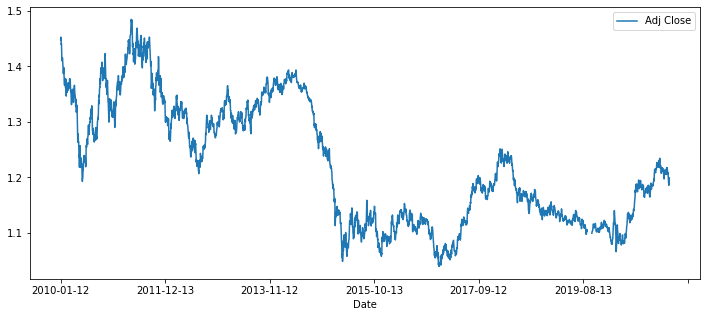

In [3]:
data.plot('Date', 'Adj Close', figsize=(12,5))

In [4]:
data['Returns'] = data['Adj Close'].pct_change()
data

,Date,Open,High,Low,Close,Adj Close,Returns
0,2010-01-12,1.450894,1.454376,1.445964,1.447660,1.447660,NaN
1,2010-01-13,1.447807,1.457705,1.445860,1.452391,1.452391,0.003268
2,2010-01-14,1.452412,1.455202,1.446257,1.449990,1.449990,-0.001653
3,2010-01-15,1.449906,1.450410,1.434576,1.439097,1.439097,-0.007512
4,2010-01-18,1.437236,1.440673,1.433692,1.440673,1.440673,0.001095
...,...,...,...,...,...,...,...
2909,2021-03-08,1.192464,1.193218,1.184834,1.192563,1.192563,-0.003519
2910,2021-03-09,1.185199,1.191600,1.183614,1.185171,1.185171,-0.006198
2911,2021-03-10,1.189669,1.192506,1.187000,1.189791,1.189791,0.003898
2912,2021-03-11,1.192748,1.197777,1.191710,1.192606,1.192606,0.002366


<AxesSubplot:xlabel='Date'>

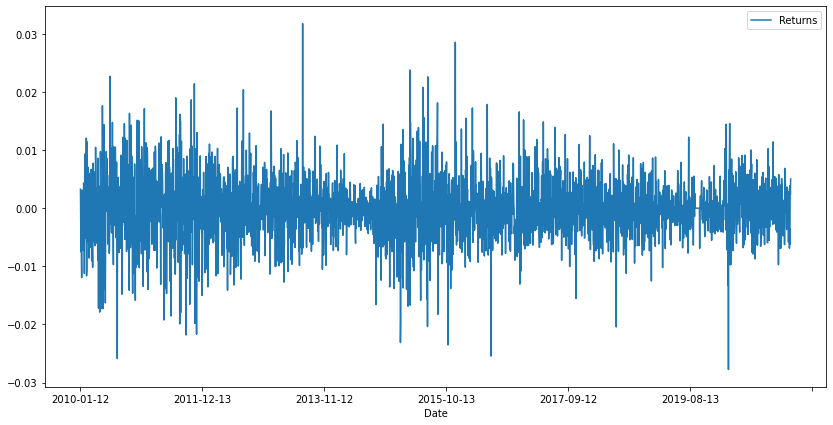

In [5]:
data.plot('Date', 'Returns', figsize=(14,7))

In [6]:
data['Label'] = data['Returns'].apply(lambda x: 1 if x>0.0 else 0)


data

,Date,Open,High,Low,Close,Adj Close,Returns,Label
0,2010-01-12,1.450894,1.454376,1.445964,1.447660,1.447660,NaN,0
1,2010-01-13,1.447807,1.457705,1.445860,1.452391,1.452391,0.003268,1
2,2010-01-14,1.452412,1.455202,1.446257,1.449990,1.449990,-0.001653,0
3,2010-01-15,1.449906,1.450410,1.434576,1.439097,1.439097,-0.007512,0
4,2010-01-18,1.437236,1.440673,1.433692,1.440673,1.440673,0.001095,1
...,...,...,...,...,...,...,...,...
2909,2021-03-08,1.192464,1.193218,1.184834,1.192563,1.192563,-0.003519,0
2910,2021-03-09,1.185199,1.191600,1.183614,1.185171,1.185171,-0.006198,0
2911,2021-03-10,1.189669,1.192506,1.187000,1.189791,1.189791,0.003898,1
2912,2021-03-11,1.192748,1.197777,1.191710,1.192606,1.192606,0.002366,1


In [12]:
n_features = 60 # number of features

train_x = np.array([]).reshape([-1,n_features])
train_y = np.array([]).reshape([-1,1])
for index, row in data.iterrows():
    i = data.index.get_loc(index)
    if i<n_features:
        continue
    
    _x = np.array(data[i-n_features+1:i+1]['Returns']).T.reshape([1, -1])
    _y = data.iloc[i]['Label']
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))
train_y = train_y.reshape([-1])
print(train_x.shape)
print(train_y.shape)
print('%% of Class0 : %f' % (np.count_nonzero(train_y == 0)/float(len(train_y))))
print('%% of Class1 : %f' % (np.count_nonzero(train_y == 1)/float(len(train_y))))

(2854, 60)
(2854,)
% of Class0 : 0.501752
% of Class1 : 0.498248


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, learning_rate=0.001, n_estimators=10000)

train_len = int(len(train_x)*0.85)

clf.fit(train_x[:train_len], train_y[:train_len])

accuracy = clf.score(train_x[train_len:], train_y[train_len:])
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 1.000000


,return,label,pred,won,pnl,equity
423,-0.000209,0.0,0.0,True,20.938478,7598.514193
424,-0.000369,0.0,0.0,True,36.885242,7635.399434
425,0.000232,0.0,0.0,True,23.197061,7658.596495
426,0.000141,1.0,1.0,True,14.079257,7672.675752
427,0.000300,1.0,1.0,True,29.958199,7702.633951


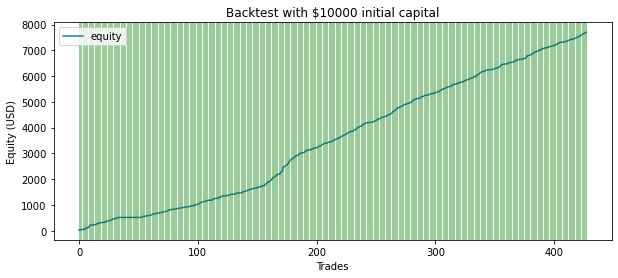

In [14]:

# Predict test data

pred = clf.predict(train_x[train_len:])
return_range = data['Returns'].max() - data['Returns'].min()

# Calculate equity..

contracts  = 100000.0
commission = 0.0


df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['return'])
df_trade['label']  = train_y[train_len:]
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']
df_trade['return'] = df_trade['return'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

def calc_profit(row):
    if row['won']:
        return abs(row['return'])*contracts - commission
    else:
        return -abs(row['return'])*contracts - commission

df_trade['pnl'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['equity'] = df_trade['pnl'].cumsum()

display(df_trade.tail())
df_trade.plot(y='equity', figsize=(10,4), title=f'Backtest with {contracts} initial capital')
plt.xlabel('Trades')
plt.ylabel('Equity (USD)')
for r in df_trade.iterrows():
    if r[1]['won']:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
    else:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')


Net Profit            : $7702.63
Number Winning Trades : 406
Number Losing Trades  : 0
Percent Profitable    : 100.00%
Avg Win Trade         : $18.972
Avg Los Trade         : $nan
Largest Win Trade     : $165.143
Largest Los Trade     : $nan
Profit Factor         : inf


<ipython-input-15-50b178db0ce9>:11: RuntimeWarning: divide by zero encountered in double_scalars
  print("Profit Factor         : %.2f" % abs(df_trade[df_trade['pnl']>0.0]['pnl'].sum()/df_trade[df_trade['pnl']<0.0]['pnl'].sum()))


<AxesSubplot:>

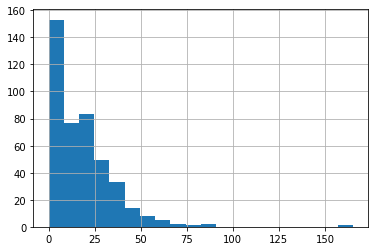

In [15]:
n_win_trades = float(df_trade[df_trade['pnl']>0.0]['pnl'].count())
n_los_trades = float(df_trade[df_trade['pnl']<0.0]['pnl'].count())
print("Net Profit            : $%.2f" % df_trade.tail(1)['equity'])
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)
print("Percent Profitable    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
print("Avg Win Trade         : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].mean())
print("Avg Los Trade         : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].mean())
print("Largest Win Trade     : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].max())
print("Largest Los Trade     : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].min())
print("Profit Factor         : %.2f" % abs(df_trade[df_trade['pnl']>0.0]['pnl'].sum()/df_trade[df_trade['pnl']<0.0]['pnl'].sum()))

df_trade['pnl'].hist(bins=20)